#HW3
### 1. Rewrite the code you have for weight-tuning_LG into the weight-tuning_LG_UA.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
data = fetch_california_housing()

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 將數據轉換為 PyTorch 張量
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-10-b6a313062a67>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-10-b6a313062a67>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-10-b6a313062a67>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-10-b6a313062a67>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourc

In [ ]:
# 設定超參數
D_in = X.shape[1]
H = 11
D_out = 1

In [123]:
# Define 2-layer neural network
model = torch.nn.Sequential(
  torch.nn.Linear(D_in, H),
  torch.nn.Tanh(),
  torch.nn.Linear(H, D_out)
)

In [124]:
# 定義優化器和損失函數
criterion = nn.MSELoss()
learning_rate = 0.1
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [125]:
# Learning Goal => when y/bar - y < 0.29 => Acceptable
stopping_criteria = 0.29

# when step size < 0.001, stop training => Unacceptable
threshold = 0.001

In [126]:
train_losses = []
# 訓練模型
b_loss = float('Inf')
epoch = 0
while b_loss > stopping_criteria:
  # 第一次forward
  optimizer.zero_grad()
  output_1 = model(X_train) # w
  torch.save(model.state_dict(), 'save.pt') # 存下w的參數
  w_loss = criterion(output_1, y_train) # Loss(w)
  w_loss.backward() # w的偏微分

  while optimizer.param_groups[0]['lr'] > threshold:
    # optimizer.step() => According to learning rate and other parameters，來更新我們的參數。
    optimizer.step() # w'：w往偏微分的方向走一個step size

    # 第二次forward
    output_2 = model(X_train) # w'
    ww_loss = criterion(output_2, y_train) # Loss(w')

    # 這裡要判斷 : Loss(w') 是否小於 Loss(w)
    if ww_loss < w_loss:
      # 目前參數：w'
      # step size變大
      optimizer.param_groups[0]['lr'] *= 1.2
      b_loss = ww_loss
      # Collect the training loss values in list
      train_losses.append(ww_loss.item())
      epoch += 1
      if epoch % 100 == 0:
        print('Epoch {}, Loss: {:.4f}'.format(epoch+1, b_loss))
      break
    else:
      # 此時 step size 一定大於 threshold
      # 參數要是：w
      model.load_state_dict(torch.load("save.pt"))
      # step size *0.7
      optimizer.param_groups[0]['lr'] *= 0.7
      b_loss = ww_loss
      # Collect the training loss values in list
      train_losses.append(ww_loss.item())
      epoch += 1
      '''if epoch > 300:
        print('Epoch {}, Loss: {:.4f} > {}'.format(epoch+1, b_loss, w_loss.item()))'''

  '''if epoch % 100 == 0:
      print('Epoch {}, Loss: {:.4f}'.format(epoch+1, b_loss))'''

  if optimizer.param_groups[0]['lr'] <= threshold:
    print('Unacceptable because learning rate too small, Epoch {}, Loss: {:.4f}, Step size: {}'.format(epoch+1, b_loss, optimizer.param_groups[0]['lr']))
    break

if b_loss < stopping_criteria:
  print('Acceptable, Epoch {}, Loss: {}'.format(epoch+1, b_loss))

Epoch 301, Loss: 0.3556
Epoch 326, Loss: 0.3529 > 0.3522205352783203
Epoch 327, Loss: 0.3580 > 0.3522205352783203
Epoch 328, Loss: 0.3594 > 0.3522205352783203
Epoch 329, Loss: 0.3581 > 0.3522205352783203
Epoch 330, Loss: 0.3561 > 0.3522205352783203
Epoch 331, Loss: 0.3543 > 0.3522205352783203
Epoch 332, Loss: 0.3532 > 0.3522205352783203
Epoch 333, Loss: 0.3525 > 0.3522205352783203
Epoch 335, Loss: 0.3536 > 0.35210055112838745
Epoch 336, Loss: 0.3527 > 0.35210055112838745
Epoch 337, Loss: 0.3523 > 0.35210055112838745
Epoch 338, Loss: 0.3521 > 0.35210055112838745
Epoch 344, Loss: 0.3519 > 0.3518247604370117
Epoch 345, Loss: 0.3518 > 0.3518247604370117
Epoch 347, Loss: 0.3518 > 0.3518223464488983
Epoch 371, Loss: 0.3518 > 0.34877562522888184
Epoch 372, Loss: 0.3586 > 0.34877562522888184
Epoch 373, Loss: 0.3597 > 0.34877562522888184
Epoch 374, Loss: 0.3575 > 0.34877562522888184
Epoch 375, Loss: 0.3545 > 0.34877562522888184
Epoch 376, Loss: 0.3521 > 0.34877562522888184
Epoch 377, Loss: 0.35

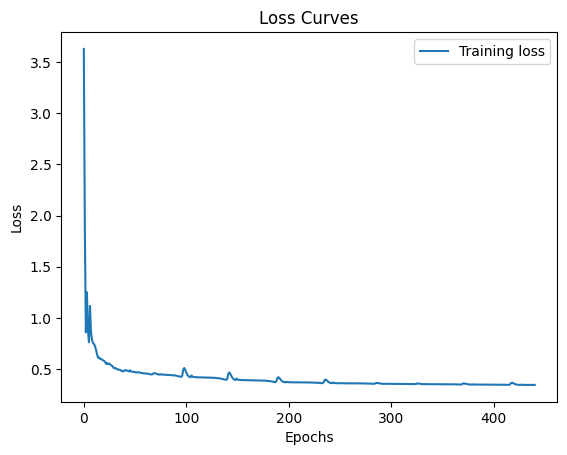

In [127]:
# 畫loss curves圖
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the network
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print('Test Loss: {}'.format(test_loss.item()))

Test Loss: 0.2941279113292694


### 2. Rewrite the code you have for weight-tuning_EB_LG into the weight-tuning_EB_LG_UA.

weight-tuning_EB_LG設定：learning goal是在epoch 4000次中，當loss < 0.3即停止training

In [ ]:
# Learning Goal => when y/bar - y < 0.29 => Acceptable
stopping_criteria = 0.29

# when step size < 0.001, stop training => Unacceptable
threshold = 0.001

# epoch bound
bound = 1000

learning_rate = 0.1

In [ ]:
# Define 2-layer neural network
model_2 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out)
)

In [ ]:
# 定義優化器和損失函數
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=learning_rate)

train_losses = []
# 訓練模型
b_loss = float('Inf')
for epoch in range(bound):
  while b_loss > stopping_criteria:
    # 第一次forward
    optimizer.zero_grad()
    output_1 = model_2(X_train) # w
    torch.save(model_2.state_dict(), 'save.pt') # 存下w的參數
    w_loss = criterion(output_1, y_train) # Loss(w)
    w_loss.backward() # w的偏微分

    while optimizer.param_groups[0]['lr'] > threshold:
      # optimizer.step() => According to learning rate and other parameters，來更新我們的參數。
      optimizer.step() # w'：w往偏微分的方向走一個step size

      # 第二次forward
      output_2 = model_2(X_train) # w'
      ww_loss = criterion(output_2, y_train) # Loss(w')

      # 這裡要判斷 : Loss(w') 是否小於 Loss(w)
      if ww_loss < w_loss:
        # 目前參數：w'
        # step size變大
        optimizer.param_groups[0]['lr'] *= 1.2
        b_loss = ww_loss
        # Collect the training loss values in list
        train_losses.append(ww_loss.item())
        epoch += 1
        if epoch % 100 == 0:
          print('Epoch {}, Loss: {:.4f}'.format(epoch+1, b_loss))
        break
      else:
        # 此時 step size 一定大於 threshold
        # 參數要是：w
        model_2.load_state_dict(torch.load("save.pt"))
        # step size *0.7
        optimizer.param_groups[0]['lr'] *= 0.7
        b_loss = ww_loss
        # Collect the training loss values in list
        train_losses.append(ww_loss.item())
        epoch += 1
        # print('Epoch {}, Loss: {:.4f} > {}'.format(epoch+1, b_loss, w_loss.item()))

    '''if epoch % 100 == 0:
        print('Epoch {}, Loss: {:.4f}'.format(epoch+1, b_loss))'''

    if optimizer.param_groups[0]['lr'] <= threshold:
      print('Unacceptable because learning rate too small, Epoch {}, Loss: {:.4f}, Step size: {}'.format(epoch+1, b_loss, optimizer.param_groups[0]['lr']))
      break

  if b_loss < stopping_criteria and optimizer.param_groups[0]['lr'] > threshold:
    print('Acceptable,early stop, Epoch {}, Loss: {}'.format(epoch+1, b_loss))
    break
  else:
    break

if epoch >= bound:
  print('Unacceptable because epoch greater than bound, Epoch {}, Loss: {:.4f}, Step size: {}'.format(epoch+1, b_loss, optimizer.param_groups[0]['lr']))


Epoch 101, Loss: 0.4040
Epoch 201, Loss: 0.3472
Epoch 301, Loss: 0.3270
Unacceptable because learning rate too small, Epoch 577, Loss: 0.3121, Step size: 0.0007168424122744073


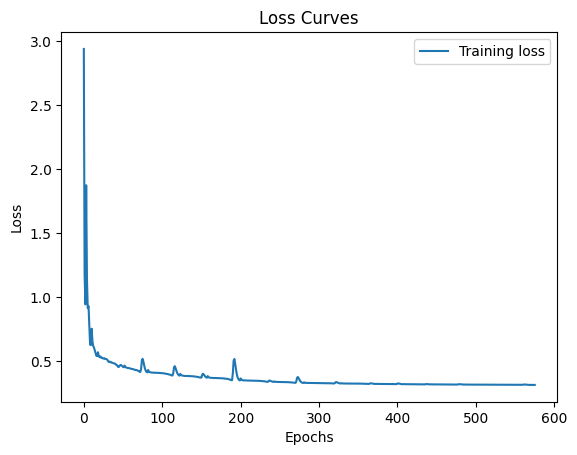

-----------------------------------
Test Loss: 0.28784552216529846


In [ ]:
# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the network
model.eval()
with torch.no_grad():
    test_outputs = model_2(X_test)
    test_loss = criterion(test_outputs, y_test)
    print('-----------------------------------')
    print('Test Loss: {}'.format(test_loss.item()))

# Evaluation

1. 加入調整Adam learning rate的step size後，發現若原本learning rate設定很小（=0.001），自動調整step size會減少很多epoch，原因是剛開始train的時後，會跨比較大步，快到低點時才收斂step size。

2. weight-tuning_LG_UA發現，loss最低大概到0.28多就下不去了。